# **Task 4.2**

- Load dataset (diabetes.csv)

- Fit a Generalized Linear Model (Logistic Regression)
    - Use LogisticRegression from sklearn.linear_model
    - Fit the model using .fit(X, y)

- Evaluate the model
    - Use .coef_ and .intercept_ to extract coefficients
    - Use sklearn.metrics.accuracy_score() for model performance
    - Use matplotlib.pyplot.plot() to visualize residuals or performance

- Train the model using cross-validation
    - Use train_test_split from sklearn.model_selection
    - Fit model on training data and evaluate on test data

In [9]:
# Preparations

import pandas as pd

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
# Fitting a logistic regression model -->> für diesen schritt wurde ChatGPT herangezogen

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = diabetes_df.drop('class', axis=1)  # all columns except 'outcome'
y = diabetes_df['class']               # the target column

# encode "class" from -->> this was done with the help of ChatGPT
# tested_positive -> 1
# tested_negative -> 0

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Initialize and fit the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X, y)

LogisticRegression(max_iter=1000)

Intercept: [-8.36507758]
Coefficients: [[ 1.22505160e-01  3.51099563e-02 -1.32987359e-02  7.78690277e-04
  -1.17362787e-03  8.96527929e-02  8.67790286e-01  1.49830228e-02]]
Accuracy: 0.78125


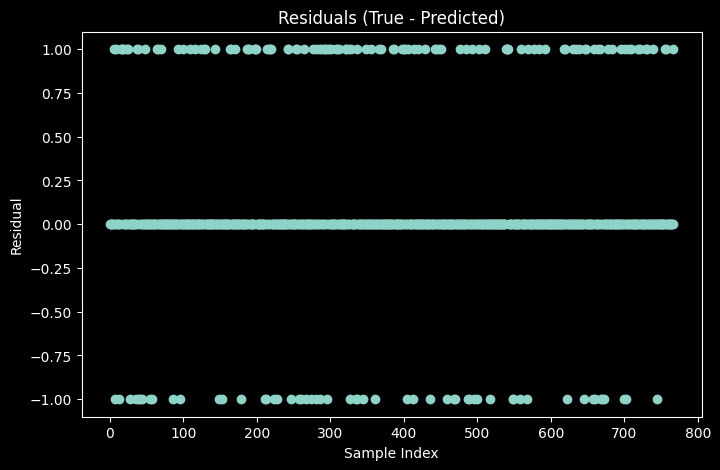

In [ ]:
# Evaluating the model -->> für diesen Schritt wurde ChatGPT herangezogen

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Coefficients and intercept
print("Intercept:", logreg_model.intercept_)
print("Coefficients:", logreg_model.coef_)

"""
Intercept: [-8.36507758]
Coefficients: [[ 1.22505160e-01  3.51099563e-02 -1.32987359e-02  7.78690277e-04  -1.17362787e-03  8.96527929e-02  8.67790286e-01  1.49830228e-02]]

"""

# Predict on the same data (later we’ll do better with cross-validation)
y_pred = logreg_model.predict(X)

# Calculate and print accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

"""
Accuracy: 0.78125
Interpretation: Das Modell ist in der Lage, zu ca 78% genaue Vorhersagen zu treffen.
"""

# Visualization

# Residuals: difference between true and predicted
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8,5))
plt.plot(residuals, 'o')
plt.title('Residuals (True - Predicted)')
plt.xlabel('Sample Index')
plt.ylabel('Residual')
plt.show()

In [ ]:
# Training the model with cross validation

from sklearn.model_selection import train_test_split

# splitting the dataset in training and test data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train on training set
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = logreg_model.predict(X_test)

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

"""
Test Accuracy: 0.7467532467532467
Interpretation: Das Modell ist in der Lage, zu ca 75% genaue Vorhersagen zu treffen.
                Insgesamt ist das Modell an neuen Daten fast genau so gut, wie an bekannten Daten.
"""

Test Accuracy: 0.7467532467532467
